In [1]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
# Download the dataset from keras
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
clothes_list = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [4]:
# Number of training and testing data
print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [5]:
# Plot first few images
def plot_picture(images,labels,test_labels,n=9):
    """
    Display a plot of n images and their labels.
    """
    plt.figure(figsize=(n+3,n+3))
    for i in range(n):
        if labels[i] == test_labels[i]:
            color = 'blue'
        else:
            color = 'red'
        # Define subplot
        plt.subplot(int(n**0.5),int(n**0.5), i+1)
        # Plot raw pixel data
        plt.imshow(images[i], cmap=plt.get_cmap('gray'))
        plt.title(clothes_list[labels[i]],color=color)

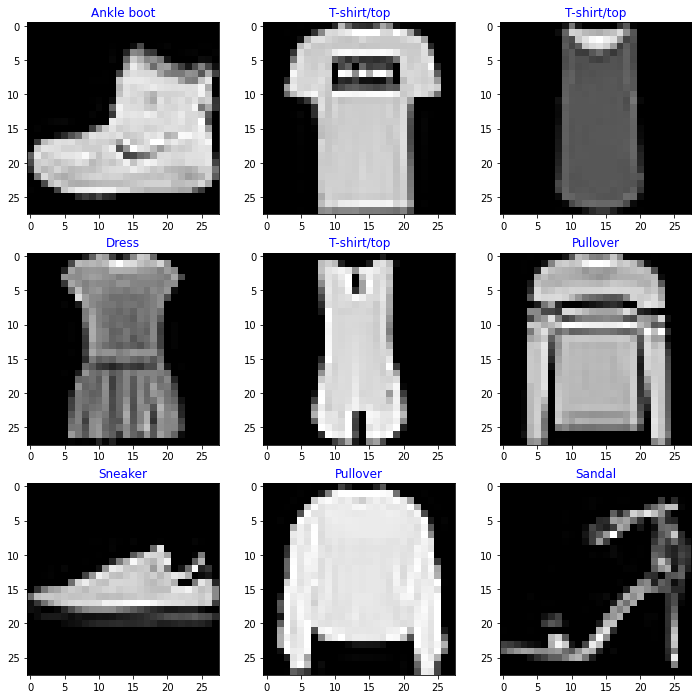

In [6]:
plot_picture(train_images,train_labels,train_labels,n=9)

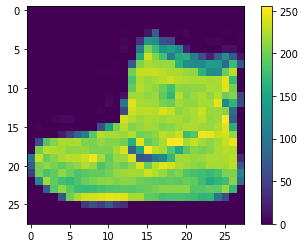

In [7]:
# See the pixel of the first picture in the training set, the value between 0 and 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
# Scale these values to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images.shape

(60000, 28, 28)

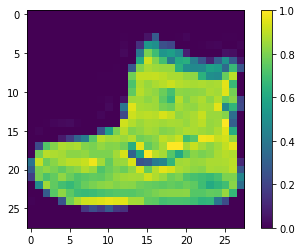

In [10]:
# See the pixel of the first picture in the training set, the value between 0 and 1
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [12]:
%time
NUN_EPOCHS = 100
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 6.91 µs


In [14]:
%time
model = tf.keras.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation="softmax"))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

r = model.fit(train_images,train_labels,
              validation_data=(test_images,test_labels),
              callbacks=[early_stopping],
              epochs=NUN_EPOCHS,
              workers=8)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 5.96 µs
Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6360 - accuracy: 0.7732 - val_loss: 0.4108 - val_accuracy: 0.8521
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3707 - accuracy: 0.8622 - val_loss: 0.3950 - val_accuracy: 0.8571
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3333 - accuracy: 0.8768 - val_loss: 0.3765 - val_accuracy: 0.8660
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3073 - accuracy: 0.8870 - val_loss: 0.3473 - val_accuracy: 0.8762
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2862 - accuracy: 0.8936 - val_loss: 0.3612 - val_accuracy: 0.8676
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2757 - accuracy: 0.8945 - val_loss: 0.3338 - val_accuracy: 0.8792
Epoch 7/100
1875/1875 [==============================] - 2s 1m

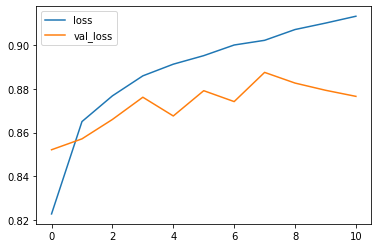

In [15]:
plt.plot(r.history['accuracy'],label='loss')
plt.plot(r.history['val_accuracy'],label='val_loss')
plt.legend();

In [16]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3699 - accuracy: 0.8766

Test accuracy: 0.8766000270843506


In [17]:
test_preds = model.predict(test_images)
test_preds = [test_pred.argmax() for test_pred in test_preds]

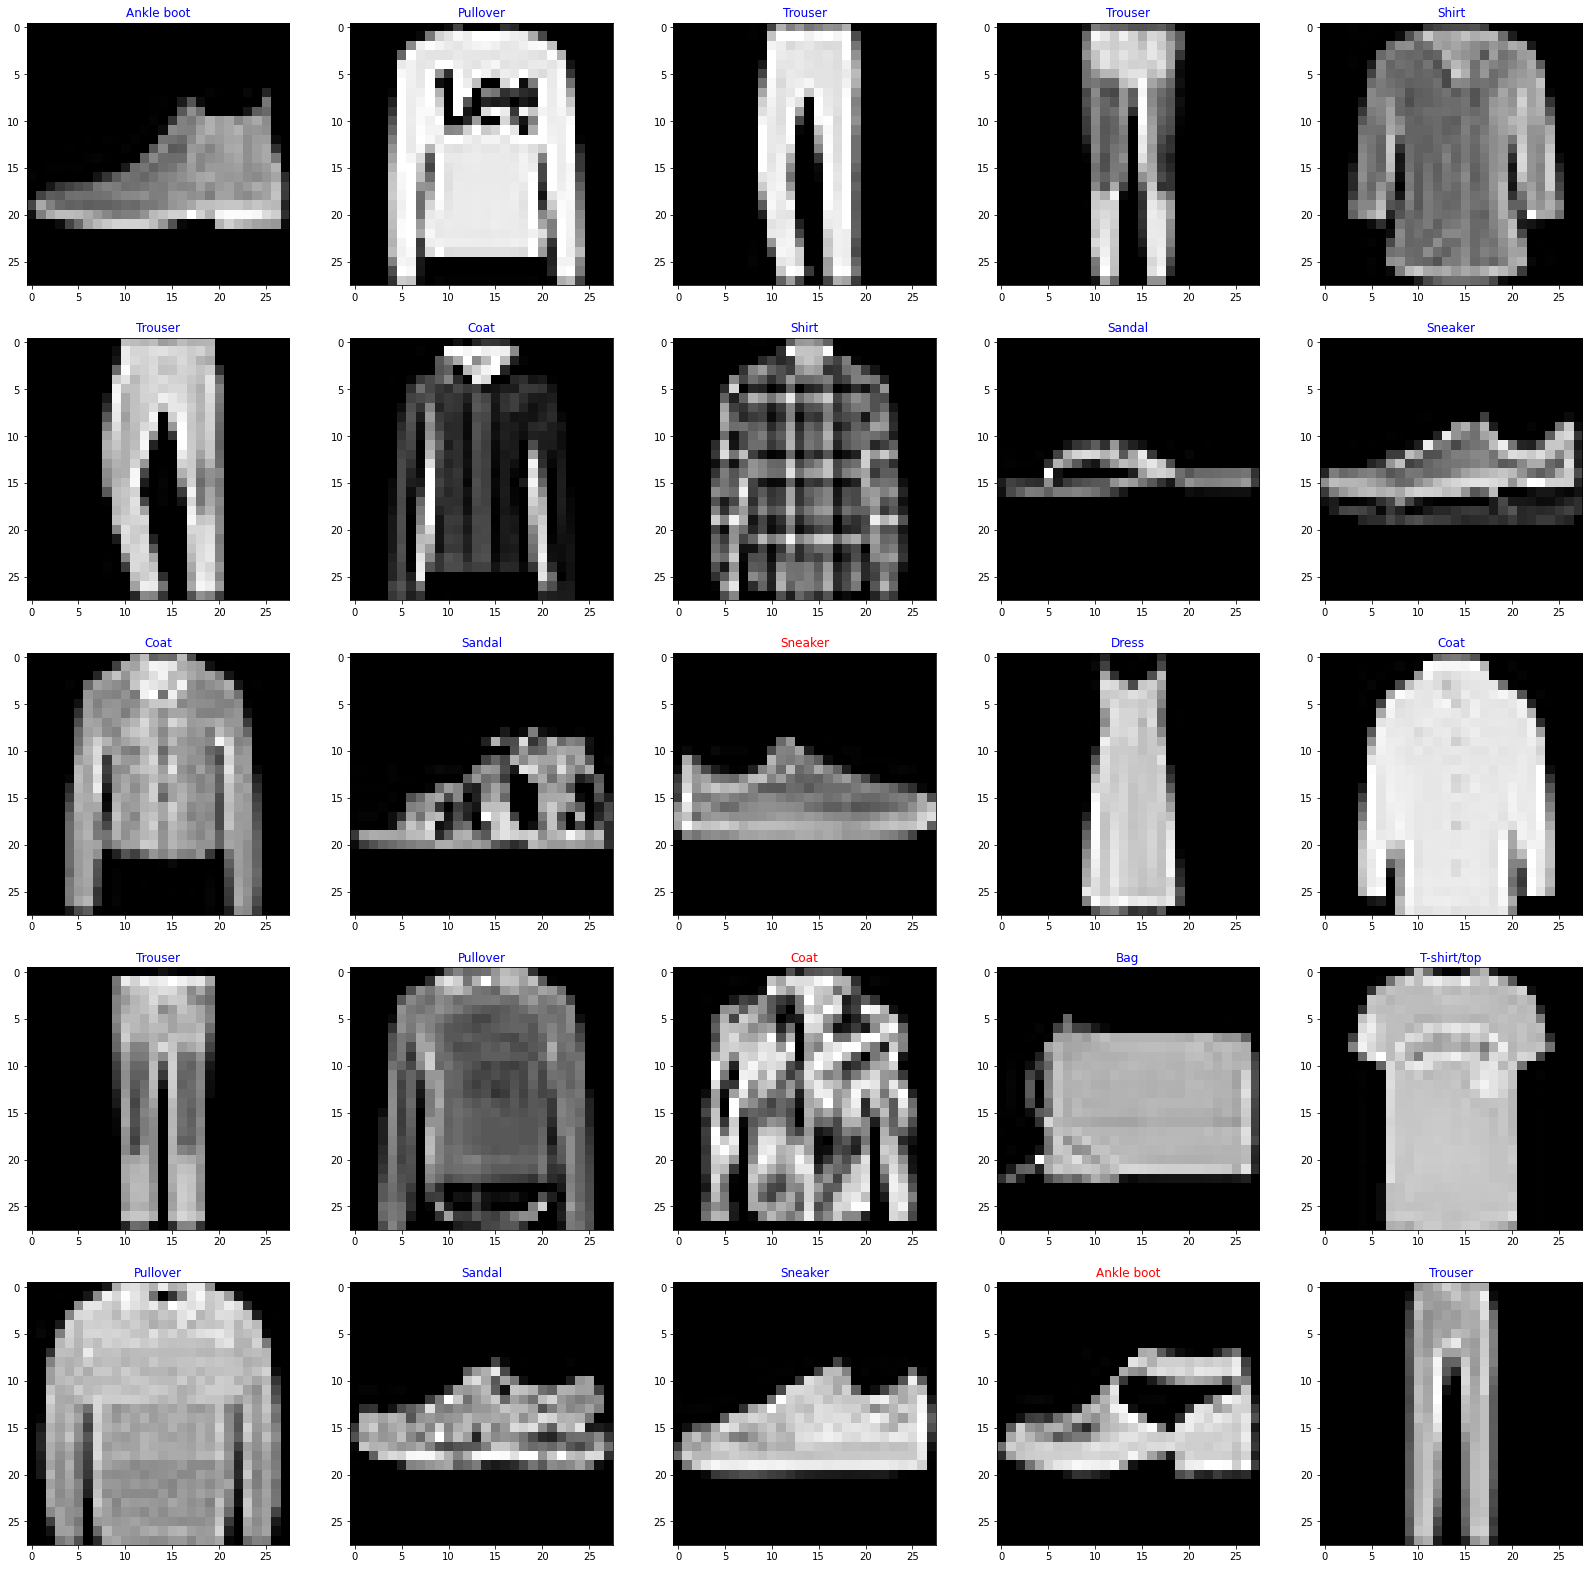

In [18]:
plot_picture(test_images,test_labels,test_preds,n=25)

In [19]:
IMG_SIZE = 28

def process_image(image_path,img_size=IMG_SIZE):
    """
    Take an image file path and turn image into a Tensor.
    """
    image = tf.io.read_file(image_path) # Read image file
    image = tf.image.decode_jpeg(image,channels=1) # Turn the image into 1 channels RGB
    image = tf.image.convert_image_dtype(image,tf.float32) # Turn the value 0-255 to 0-1
    image = tf.image.resize(image,size=[img_size,img_size]) # Resize the image to 224x224
    image = np.array(image).reshape(28,28)
    image = (-1*image+1)
    return image 

In [20]:
img_path = "test/1.jpg"
img_real = process_image(img_path)

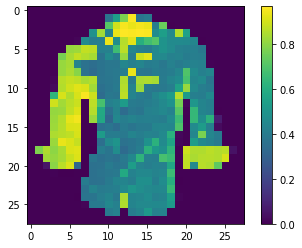

In [21]:
# See the pixel of the first picture in the training set, the value between 0 and 255
plt.figure()
plt.imshow(img_real)
plt.colorbar()
plt.grid(False)
plt.show()

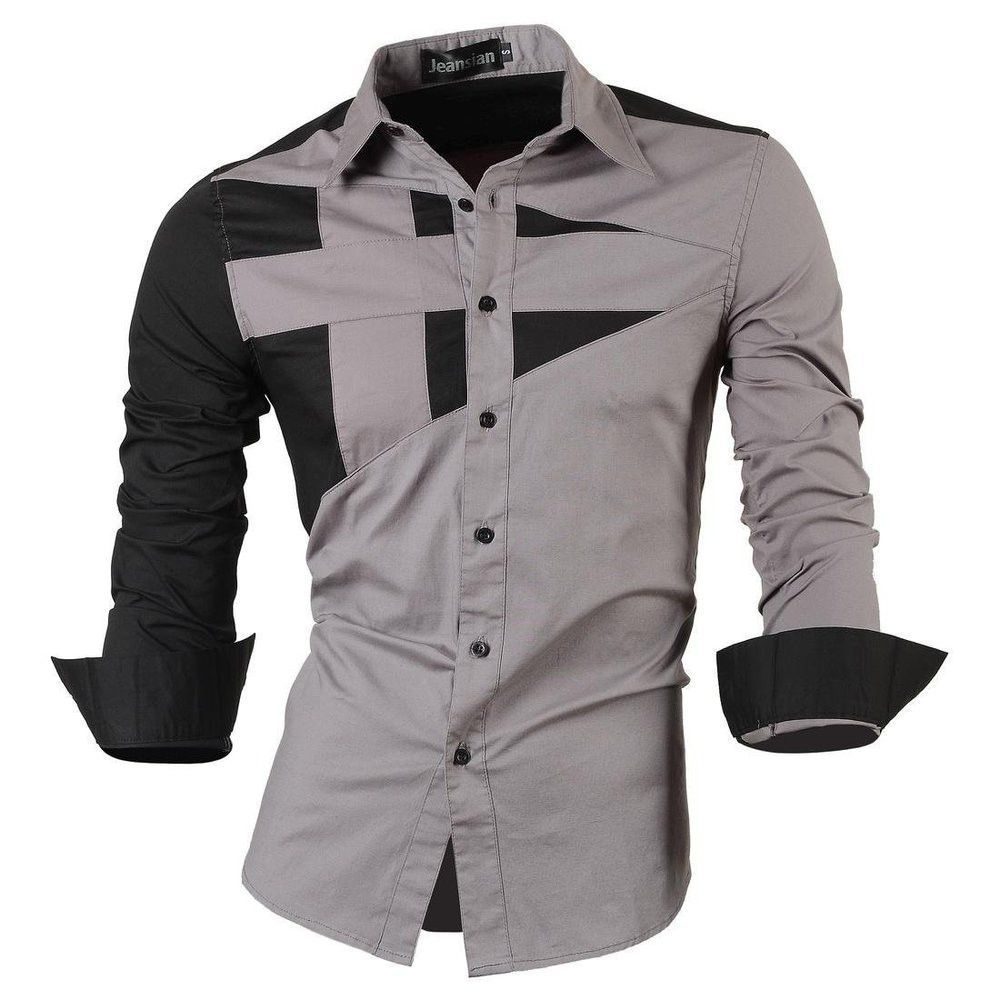

In [22]:
from IPython.display import Image

Image(img_path,width=300,height=300)

In [23]:
predictions_single = model.predict(img_real.reshape(1,28,28))
predicted_list = []
for i,predict in enumerate(predictions_single[0],0):
    predicted_list.append([predict,clothes_list[i]])
predicted_list = sorted(predicted_list,reverse=True)
for predicted in predicted_list:
    print(f"{predicted[1]}: {predicted[0]*100:.2f}%")

Shirt: 99.96%
T-shirt/top: 0.03%
Coat: 0.01%
Pullover: 0.00%
Dress: 0.00%
Bag: 0.00%
Trouser: 0.00%
Sandal: 0.00%
Sneaker: 0.00%
Ankle boot: 0.00%


In [21]:
model.save("models/clothes-classification.h5")